In [9]:
!export CUDA_VISIBLE_DEVICES=0

import torch, json
import numpy as np 
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode

from escnn import gspaces, nn, group

from vae_dist.dataset.dataset import FieldDataset
from vae_dist.data.visualize import get_latent_space, plot_vfield
from vae_dist.core.training_utils import construct_model 

init_notebook_mode(connected=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [40]:
# load all datasets

root = "../../data/augment_test/"

dataset_test = FieldDataset(
    root, 
    transform=False, 
    augmentation=False,
    standardize=False,
    lower_filter=True,
    log_scale=True, 
    min_max_scale=True,
    wrangle_outliers=False,
    scalar=False,
    device=device
    )

root = "../../data/cpet/"

dataset = FieldDataset(
    root, 
    transform=False, 
    augmentation=False,
    standardize=False,
    lower_filter=True,
    log_scale=True, 
    min_max_scale=True,
    wrangle_outliers=False,
    scalar=False,
    device=device
    )


root = "../../data/cpet_augmented/"
dataset_aug_cpet = FieldDataset(
    root, 
    transform=False, 
    augmentation=False,
    standardize=False,
    lower_filter=True,
    log_scale=True, 
    min_max_scale=True,
    wrangle_outliers=False,
    scalar=False,
    device=device
    )

Data shape:  (8, 3, 21, 21, 21)
Data type:  float64
------------------------- Preprocessing Info -------------------------
Helmholtz-Hodge decomposition applied:  False
Lower filter applied:  True
Log scale applied:  True
Standardization applied:  False
Min max scaling applied:  True
Wrangling outliers applied:  False
------------------------- Data Info -------------------------
Mean value in dataset:  -0.005078240290825326
Standard deviation in dataset:  0.051772067488900717
Largest value in dataset:  1.0
Smallest value in dataset:  -1.03
Nan values in dataset:  False
Inf values in dataset:  False
Data shape:  (187, 3, 21, 21, 21)
Data type:  float64
------------------------- Preprocessing Info -------------------------
Helmholtz-Hodge decomposition applied:  False
Lower filter applied:  True
Log scale applied:  True
Standardization applied:  False
Min max scaling applied:  True
Wrangling outliers applied:  False
------------------------- Data Info -------------------------
Mean value

In [12]:


options = json.load(open('./options/options_escnn_default.json'))
model_escnn = construct_model("escnn", options)
options = json.load(open('./options/options_esvae_default.json'))
model_esvae = construct_model("esvae", options)
options = json.load(open('./options/options_cnn_default.json'))
model_cnn = construct_model("cnn", options)
options = json.load(open('./options/options_vae_default.json'))
model_vae = construct_model("vae", options)

#model_esvae.load_model("./log_version_esvae_1/model_1.ckpt")
model_esvae.load_model("./log_version_esvae_1/model_single_datapoint.ckpt")
model_escnn.load_model("./log_version_escnn_1/model_single_datapoint.ckpt")

#model_escnn.load_model("./log_version_escnn_1/model_1.ckpt")
# move model to gpu 
model_cnn.to(device)
model_escnn.to(device)
model_esvae.to(device)
model_vae.to(device)
model_cnn.eval()
model_escnn.eval()
model_esvae.eval()
model_vae.eval()

inner_dim:  3
in_type: [O(3)_on_R3[o3]: {irrep_0,0 (x3)}(3)] out_type: [O(3)_on_R3[o3]: {irrep_0,0 (x32)}(32)]
in_type: [O(3)_on_R3[o3]: {irrep_0,0 (x32)}(32)] out_type: [O(3)_on_R3[o3]: {irrep_0,0 (x64)}(64)]
in_type: [O(3)_on_R3[o3]: {irrep_0,0 (x64)}(64)] out_type: [O(3)_on_R3[o3]: {irrep_0,0 (x128)}(128)]
in_type: [O(3)_on_R3[o3]: {irrep_0,0 (x128)}(128)] out_type: [O(3)_on_R3[o3]: {irrep_0,0 (x256)}(256)]
in_type: [O(3)_on_R3[o3]: {irrep_0,0 (x256)}(256)] out_type: [O(3)_on_R3[o3]: {irrep_0,0 (x512)}(512)]
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                [-1, 13824]               0
            Linear-2                  [-1, 100]       1,382,500
         LeakyReLU-3                  [-1, 100]               0
           Dropout-4                  [-1, 100]               0
            Linear-5                   [-1, 50]           5,050
         LeakyReLU-6              

# Latent Space Plotting

Total number of fields:  187


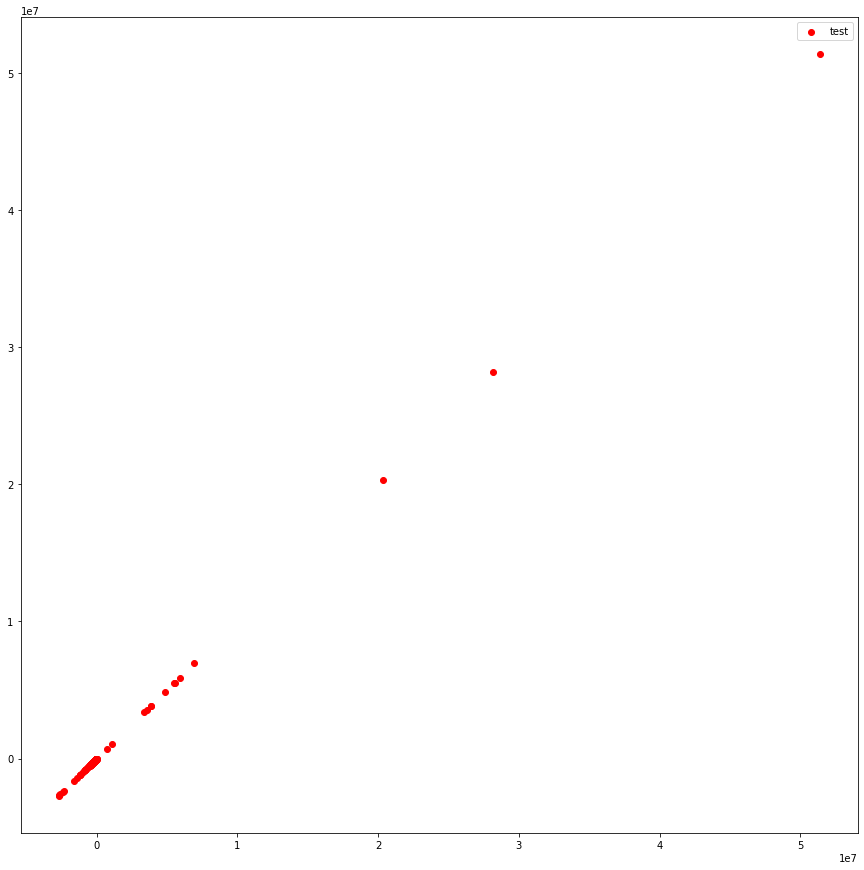

2635323.525711174


In [41]:
model = model_escnn

plt.figure(figsize=(15, 15))
latent_space = get_latent_space(model, dataset, comp=[0, 0], latent_dim=1)
plt.scatter(latent_space[:, 0], latent_space[:, 1], c="red", label="test")
plt.legend()
plt.show()


mean_dist = 0
for i in range(latent_space.shape[0]):
    for j in range(latent_space.shape[0]):
        mean_dist += np.linalg.norm(latent_space[i] - latent_space[j])
mean_dist /= latent_space.shape[0]**2
print(mean_dist)

Total number of fields:  8


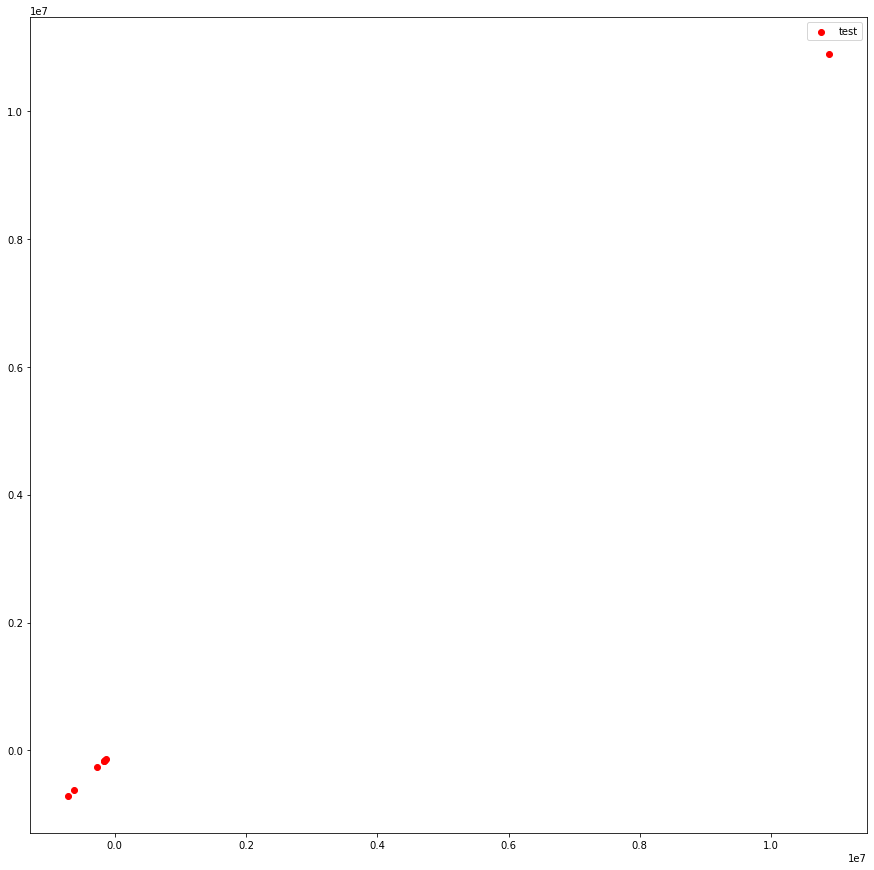

3711196.418273926


In [29]:
plt.figure(figsize=(15, 15))
latent_space = get_latent_space(model , dataset_test, comp=[0, 0], latent_dim=1)
plt.scatter(latent_space[:, 0], latent_space[:, 1], c="red", label="test")
plt.legend()
plt.show()
# compute average distance between points in latent space
mean_dist = 0
for i in range(latent_space.shape[0]):
    for j in range(latent_space.shape[0]):
        mean_dist += np.linalg.norm(latent_space[i] - latent_space[j])
mean_dist /= latent_space.shape[0]**2
print(mean_dist)

Total number of fields:  1674
Total number of fields:  187
Total number of fields:  8


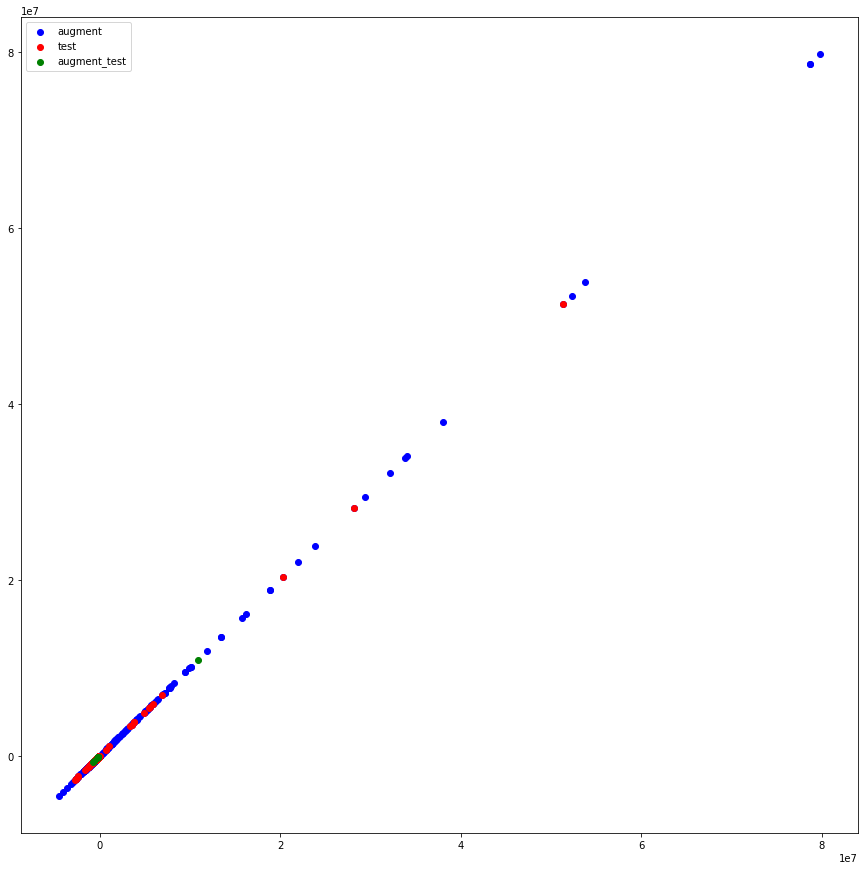

In [43]:



plt.figure(figsize=(15, 15))
latent_space = get_latent_space(model, dataset_aug_cpet, comp=[0, 0], latent_dim=1)
plt.scatter(latent_space[:, 0], latent_space[:, 1], c="blue", label="augment")

latent_space = get_latent_space(model, dataset, comp=[0, 0], latent_dim=1)
plt.scatter(latent_space[:, 0], latent_space[:, 1], c="red", label="test")

latent_space = get_latent_space(model, dataset_test, comp=[0, 0], latent_dim=1)
plt.scatter(latent_space[:, 0], latent_space[:, 1], c="green", label="augment_test")

plt.legend()
plt.show()



# run the equivariance test


In [66]:
from escnn.gspaces import gspace


def equiv_test(model, dataset_test, device):
    groupie = group.so3_group()
    groupie.testing_elements(n=1)
    gspace = gspaces.flipRot3dOnR3(maximum_frequency=16) 
    input_out_reps = 3*[gspace.trivial_repr]
    feat_type_in  = nn.FieldType(gspace,  input_out_reps) 
    
    print('##########################################################################################')
    with torch.no_grad():
        #x = next(iter(dataset_test)).reshape(1, 3, 21, 21, 21).to(device)
        x = dataset_test[0].reshape(1, 3, 21, 21, 21).to(device)
        y = model(x).cpu()
        #print("Outputs' magnitudes")
        #print(torch.linalg.norm(y, dim=1).numpy().reshape(-1))
        # print largest value 
        print("Largest value in input")
        print(torch.max(torch.linalg.norm(x.cpu(), dim=1)).numpy())
        print("Largest value in output")
        print(torch.max(torch.linalg.norm(y, dim=1)).numpy())
        print('##########################################################################################')
        print("Errors' magnitudes")
        
        for r in range(8):

            x_equi = feat_type_in(dataset_test[r].reshape(1, 3, 21, 21, 21).to(device))
            #x_transformed = g @ x_equi
            x_transformed = x_equi.transform(gspace.testing_elements[r])
            x_transformed = x_transformed.to(device)
            y_from_x_transformed = model(x_transformed.tensor).to('cpu')
            y_transformed_from_x = feat_type_in(y).transform(gspace.testing_elements[r]).tensor

            # verify that f(g@x) = g@f(x)=g@y
            # print maximum error
            #print(torch.linalg.norm(y_transformed - (g@y_group_rep).tensor, dim=1).numpy().reshape(-1))        
            print("Largest error")
            print(torch.max(torch.linalg.norm(y_from_x_transformed - y_transformed_from_x, dim=1)).numpy())
    print('##########################################################################################')
    print()
equiv_test(model_esvae, dataset_aug_cpet, device)

##########################################################################################
Largest value in input
0.47010636
Largest value in output
0.0012760572
##########################################################################################
Errors' magnitudes
Largest error
6.6558115e-10
Largest error
6.540272e-10
Largest error
6.34345e-10
Largest error
6.8876077e-10
Largest error
6.6191225e-10
Largest error
6.9438716e-10
Largest error
6.9438716e-10
Largest error
6.5600736e-10
##########################################################################################



# Visualize in/out field from model


In [67]:
plot_vfield(
        dataset.data[0], 
        cutoff_low = 0, 
        cutoff_high=100, 
        min_max = False,
        scale = 2)
#fig.show()
#fig.write_html("cones_.html")

TypeError: split_and_filter() got an unexpected keyword argument 'min_max'

In [7]:
# model reconstruction
model = model_vae
x = dataset_test[0].reshape(1, 3, 21, 21, 21).to(device)
x_out = model.forward(x)
x_out = x_out.to('cpu').detach().numpy().reshape(3, 21, 21, 21)

plot_vfield(
        x_out, 
        cutoff_low = 90, 
        cutoff_high=100, 
        min_max = False,
        scale = 2)


RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

# Q-Q Plot

In [35]:
# q-q plot of the latent space

latent_space = get_latent_space(model, dataset, comp=[0, 1], latent_dim=10)

import scipy.stats as stats
import pylab 
import statsmodels.api as sm
sm.qqplot(latent_space[:,1], line='45')
pylab.show()



Total number of fields:  187


ValueError: cannot reshape array of size 374 into shape (10)

In [36]:
latent_space = get_latent_space(model, dataset, latent_dim=2)
component = 2
plt.scatter(latent_space[:, component], latent_space[:, component], c="red", label="test")


Total number of fields:  187


IndexError: index 2 is out of bounds for axis 1 with size 2